In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import utils
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

print("Torch Version:", torch.__version__)
print("Torchvision Version: ", torchvision.__version__)

Torch Version: 1.11.0
Torchvision Version:  0.12.0


In [2]:
x = torch.ones(2,3)
print(x.dtype)

torch.float32


In [3]:
r = torch.ones(3,3, dtype=torch.uint8)
print(r)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.uint8)


In [4]:
r = r.type(torch.float)

In [5]:
r = r.numpy()
print(r)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [6]:
x = np.zeros((2,2), dtype=np.float32)

In [7]:
y = torch.from_numpy(x)
print(y)
print(y.dtype)

tensor([[0., 0.],
        [0., 0.]])
torch.float32


## Loasing a dataset

In [15]:
# path to store data
path2data = '../../Datasets/PyTorch'
train_data = datasets.MNIST(path2data, train=True, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../../Datasets/PyTorch/MNIST/raw/train-images-idx3-ubyte.gz to ../../Datasets/PyTorch/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../../Datasets/PyTorch/MNIST/raw/train-labels-idx1-ubyte.gz to ../../Datasets/PyTorch/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../../Datasets/PyTorch/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../Datasets/PyTorch/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../../Datasets/PyTorch/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../Datasets/PyTorch/MNIST/raw



In [17]:
# Extract data and targets
X_train, y_train = train_data.data, train_data.targets
print(X_train.shape)
print(y_train.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


In [18]:
# Load validation data
val_data = datasets.MNIST(path2data, train=False, download=True)

In [19]:
# extract data and target

X_val, y_val = val_data.data, val_data.targets
print(X_val.shape)
print(y_val.shape)

torch.Size([10000, 28, 28])
torch.Size([10000])


In [21]:
# add a dimention to tensor to become B*C*H*W
if len(X_train.shape)==3:
    X_train = X_train.unsqueeze(1)
print(X_train.shape)

if len(X_val.shape)==3:
    X_val = X_val.unsqueeze(1)
print(X_val.shape)

torch.Size([60000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])


In [23]:
def show(img):
    # convert tensors to numpy array
    npimg = img.numpy()
    # convert to H*W*C
    npimg_tr = np.transpose(npimg, (1,2,0))
    plt.imshow(npimg_tr)

torch.Size([3, 152, 242])


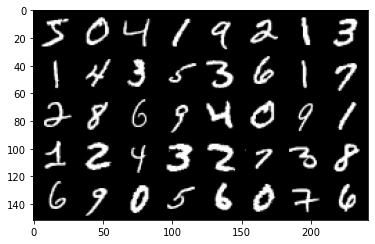

In [36]:
# make a grid of 40 images
x_grid = utils.make_grid(X_train[:40], nrow=8, padding=2)
print(x_grid.shape)

# call helper functoin
show(x_grid)

## Data Transformatoin

In [39]:
# load MNIST training dataset
train_data = datasets.MNIST(path2data, train=True, download=True)

# define transformations
data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    transforms.RandomVerticalFlip(p=1),
    transforms.ToTensor(),
])

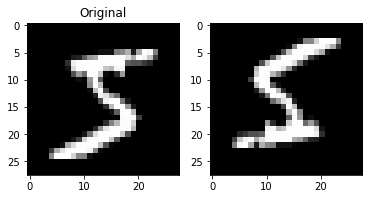

In [68]:
# get a sample image form training dataset
img = train_data[0][0]
# transform sample image
img_tr = data_transform(img)
# convert to numpy
img_tr_np = img_tr.numpy()
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(img_tr_np[0], cmap='gray')

## Wrapping tensors into a dataet

In [69]:
# Wrap tensors into a dataset
train_ds = TensorDataset(X_train, y_train)
val_ds = TensorDataset(X_val, y_val)

for x,y in train_ds:
    print(x.shape, y.item())
    break

torch.Size([1, 28, 28]) 5


## Creating data loaders

In [70]:
# create a data loader from dataset
train_dl = DataLoader(train_ds, batch_size=8)
val_dl = DataLoader(val_ds, batch_size=8)

# iterate over batches
for xb, yb, in train_dl:
    print(xb.shape)
    print(yb.shape)
    break

torch.Size([8, 1, 28, 28])
torch.Size([8])
